# PCA

![Test](https://github.com/nielsrolf/pca/workflows/Test/badge.svg)
[![codecov](https://codecov.io/gh/nielsrolf/pca/branch/master/graph/badge.svg)](https://codecov.io/gh/nielsrolf/pca)
![Lint](https://github.com/nielsrolf/pca/workflows/Lint/badge.svg)

# Principal Component Analysis Using SVD

I use PCA quite often, mainly for visualization. This little project is basically a class that I implemented way too often and that provides a nice API to fit PCA to data and use it.

## Install
```
python setup.py install  # or python setup.py develop
```

## Test
```
pytest tests
```

## Demo
This notebook contains a few examples on how to use PCA for data whitening, decorrelation, dimensionality reduction, reconstruction and plotting the eigenvalues.

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from pca import PCA

## Whitening and decorrelation on a normal distribution

Covariance of the original data:
 [[ 2.   -1.49]
 [-1.49  4.33]]
Covariance of the decorrelated data:
 [[5.06 0.  ]
 [0.   1.27]]


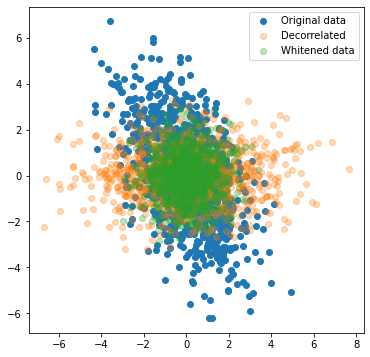

Covariance of the whitened data:
 [[1. 0.]
 [0. 1.]]


In [16]:
A = np.array([[1, 0.5], [-1, 2]])
x = np.random.normal(0, 1, size=[1000, 2])@A 

pca = PCA(x)
x_whitened = pca.transform(x, ndims=3)

x_decorrelated = pca.decorrelate(x)


plt.figure(figsize=(6,6))
plt.scatter(x[:,0], x[:,1], label="Original data")
print("Covariance of the original data:\n", np.cov(x.T).round(2))


plt.scatter(x_decorrelated[:,0], x_decorrelated[:,1], label="Decorrelated", alpha=0.3)
print("Covariance of the decorrelated data:\n", np.cov(x_decorrelated.T).round(2))

plt.scatter(x_whitened[:,0], x_whitened[:,1], label="Whitened data", alpha=0.3)
plt.legend()
plt.show()
print("Covariance of the whitened data:\n", np.cov(x_whitened.T).round(2))



### Reconstruction error

If we use PCA to project `D`-dimensional data onto the `d`-dimensional hyperplane and then project this back to the original space, we will end up with some reconstruction error. PCA finds linear transformations from the `D`-dimensional space into the `d`-dimensional space, such that this error is minimal. This leads to the error being orthogonal to the hyperplane, which we can show here:

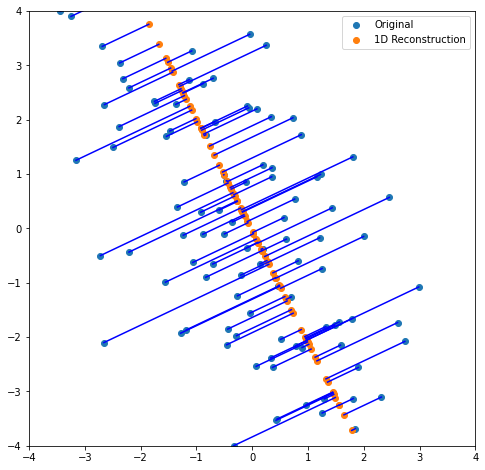

In [21]:
x = x[:100]
x_w = pca.transform(x, ndims=1)
x_r = pca.inverse_transform(x_w)
plt.figure(figsize=(8, 8))
plt.scatter(x[:,0], x[:,1], label='Original')
for i in range(len(x)):
    plt.plot([x[i,0], x_r[i,0]], [x[i,1], x_r[i,1]], color='blue')
plt.scatter(x_r[:,0], x_r[:,1], label='1D Reconstruction')
plt.legend()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

## MNIST Example

For this example, you will need to install tensorflow. You could also load MNIST from another source if you would like to avoid installing tensorflow.

In [ ]:
!pip install tensorflow

In [39]:
def visualize_digits(X, Y=None):
    X = (X+1)/2
    X = X.reshape([-1, 28, 28])
    rows, cols = int(np.sqrt(len(X))), int(np.ceil(np.sqrt(len(X))))
    fig, axes = plt.subplots(nrows=rows, ncols=cols, squeeze=False,
                            figsize=(cols,rows,))
    for i, x in enumerate(X):
        row = int(i/cols)
        col = i % cols
        ax = axes[row][col]
        if Y is not None:
            y = Y[i]
            ax.set_title(np.argmax(y))
        ax.tick_params(
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            left=False,
            right=False,
            labelbottom=False,
            labelleft=False) # labels along the bottom edge are off
        ax.imshow(x, cmap='gray')
    plt.tight_layout()
    plt.show()

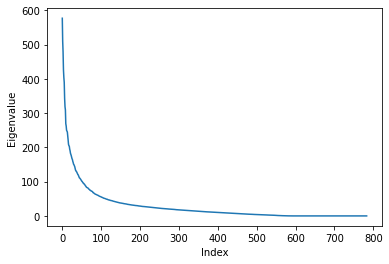

First eigenvecotrs


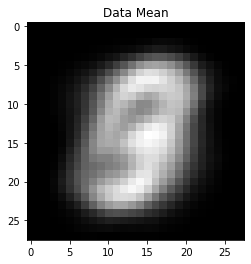

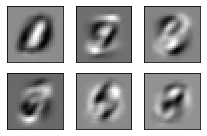

In [41]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

pca = PCA(X_train[:1000])

pca.plot_eigenvalues()
# pca.plot_reconstruction_error_over_ndims(X_train)

print("First eigenvecotrs")
eigenvectors = pca.get_eigenvectors(6)
plt.imshow(pca.mean.reshape(28, 28), cmap='gray')
plt.title("Data Mean")
plt.show()

visualize_digits(eigenvectors)

### Reconstruction from lower dimensional projection

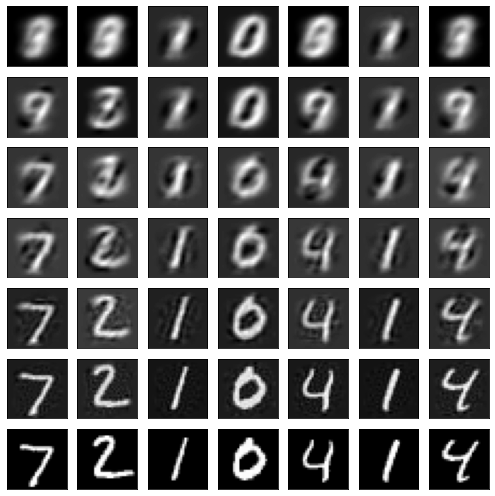

In [42]:
data = X_test[:7]
imgs = []
for d in [1, 3, 9, 27, 81, 243]:
    x_d = pca.transform(data, d)
    x_r = pca.inverse_transform(x_d)
    imgs += [x_r]
imgs += [data]
imgs = np.concatenate(imgs, axis=0)
visualize_digits(imgs)

### Class distribution 

In [ ]:
!pip install plotly
!pip install pandas

In [53]:
import plotly.express as px
import pandas as pd


def plot_classes(X, Y, labels=range(10), s=1, show_legend=True, **kwargs):
    pca = PCA(X[:1000])
    X = pca.decorrelate(X, 3)
    df = pd.DataFrame(X, columns=["x", "y", "z"])
    df["Label"] = Y if Y.ndim==1 else Y.argmax(1)
    fig = px.scatter_3d(df, x="x", y="y", z="z",
                  color="Label")
    fig.show()

    
plot_classes(X_test, Y_test)
plt.show()